In [1]:
import pandas, warnings

import seaborn as sns

import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

sns.set_style("whitegrid")

In [2]:
colors = ["#BC9F8B", "#B5CFB7", "#C5705D", "#ACE1AF", "#B3C8CF"]

def barplot(result, **barlimit):
  if "ylabel" not in barlimit.keys():
    barlimit["ylabel"] = "Total Trip"
  if "color" not in barlimit.keys():
    barlimit["color"] = colors
  bar = result.plot.bar(rot=0, **barlimit)
  for container in bar.containers:
    bar.bar_label(container, fmt="%1.1f")

def pieplot(result, **pieargs):
  if "colors" not in pieargs.keys():
    pieargs["colors"] = colors
  pieargs["ylabel"] = ""
  plot = result.plot.pie(**pieargs);

def lineplot(result, **lineargs):
  plot = result.plot.line(**lineargs)
  plot.set_xticks(result.index);

In [3]:
url = "/content/trainstati.csv"

tanggal = ["time_estimated", "destination_time", "updated_at"]

origin = pandas.read_table(url, sep=",", parse_dates=tanggal)

origin.iloc[:5, :7]

,id,station_id,train_id,line,route,color,destination
0,AC-2400,AC,2400,COMMUTER LINE TANJUNGPRIUK,JAKARTAKOTA-TANJUNGPRIUK,#DD0067,TANJUNGPRIUK
1,AC-2401,AC,2401,COMMUTER LINE TANJUNGPRIUK,TANJUNGPRIUK-JAKARTAKOTA,#DD0067,JAKARTAKOTA
2,AC-2402,AC,2402,COMMUTER LINE TANJUNGPRIUK,JAKARTAKOTA-TANJUNGPRIUK,#DD0067,TANJUNGPRIUK
3,AC-2403,AC,2403,COMMUTER LINE TANJUNGPRIUK,TANJUNGPRIUK-JAKARTAKOTA,#DD0067,JAKARTAKOTA
4,AC-2404,AC,2404,COMMUTER LINE TANJUNGPRIUK,JAKARTAKOTA-TANJUNGPRIUK,#DD0067,TANJUNGPRIUK


In [4]:
origin.iloc[:5, 7:]

,time_estimated,destination_time,updated_at,statiun,asal,time
0,2024-06-02 06:07:00,2024-06-02 06:16:00,2024-03-16 17:00:08.063000+00:00,ANCOL,JAKARTAKOTA,9.0
1,2024-06-02 06:34:00,2024-06-02 06:42:00,2024-03-16 17:00:08.063000+00:00,ANCOL,TANJUNGPRIUK,8.0
2,2024-06-02 06:24:00,2024-06-02 06:33:00,2024-03-16 17:00:08.063000+00:00,ANCOL,JAKARTAKOTA,9.0
3,2024-06-02 06:50:00,2024-06-02 06:58:00,2024-03-16 17:00:08.063000+00:00,ANCOL,TANJUNGPRIUK,8.0
4,2024-06-02 06:43:00,2024-06-02 06:52:00,2024-03-16 17:00:08.063000+00:00,ANCOL,JAKARTAKOTA,9.0


In [5]:
origin.isnull().sum().sum()

0

In [6]:
origin.duplicated().sum()

0

In [7]:
total_trip = origin["id"].count()

total_trip

18065

In [8]:
assert total_trip == origin.shape[0], "Fail !"

In [9]:
total_liner = origin["line"].nunique()

total_liner

10

In [10]:
triline = origin["line"].value_counts().to_frame()

triline = triline.rename(columns={"count": "Total Trip"})

triline.index = triline.index.str.replace("COMMUTER LINE", "")

triline.index = triline.index.str.strip()

triline.iloc[:5]

,Total Trip
line,
BOGOR,7456
CIKARANG,5203
RANGKASBITUNG,2931
TANGERANG,1230
BST,588


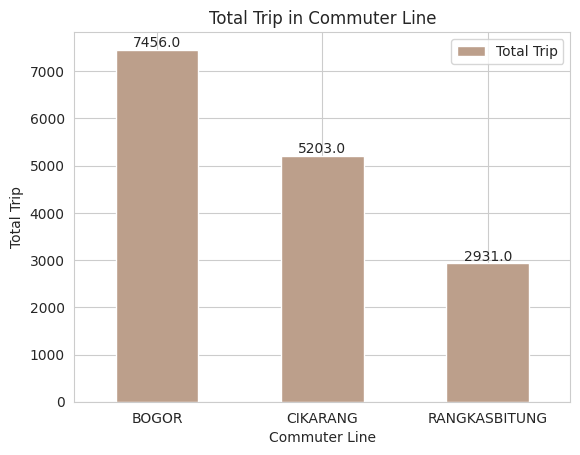

In [11]:
title = "Total Trip in Commuter Line"

barplot(triline.iloc[:3], xlabel="Commuter Line", ylabel="Total Trip", title=title)

In [12]:
triline = origin.groupby(["line"]).agg({"route":"nunique", "statiun":"nunique"})

triline.columns = ["Total Route", "Total Statiun"]

triline.index = triline.index.str.replace("COMMUTER LINE", "")

triline.index = triline.index.str.strip()

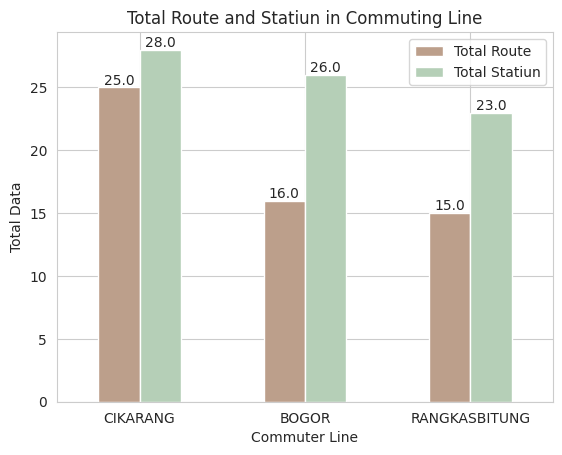

In [13]:
triline = triline.sort_values("Total Route", ascending=False)

title = "Total Route and Statiun in Commuting Line"

barplot(triline.iloc[:3], xlabel="Commuter Line", ylabel="Total Data", title=title)

In [14]:
triline = origin.groupby(["line"])["time"].agg(["min", "max", "mean"]).round(3)

triline.index = triline.index.str.replace("COMMUTER LINE", "")

triline.sort_values("mean").iloc[:5]

,min,max,mean
line,,,
TANJUNGPRIUK,4.0,16.0,10.984
TANGERANG,3.0,28.0,15.473
BST,5.0,33.0,16.762
CIKARANG,3.0,98.0,35.158
PRAMBANAN EKSPRES,14.0,68.0,36.250


In [15]:
jamly = origin["time_estimated"].dt.hour.value_counts().to_frame().sort_index()

jamly = jamly.rename(columns={"count": "total_trip"})

jamly.iloc[:5]

,total_trip
time_estimated,
0,147
1,2
3,20
4,315
5,765


In [16]:
jarly = jamly.sort_values("total_trip", ascending=False)

jarly.iloc[:5]

,total_trip
time_estimated,
7,1154
8,1136
17,1130
18,1101
6,1086


In [17]:
jarly.tail()

,total_trip
time_estimated,
23,426
4,315
0,147
3,20
1,2


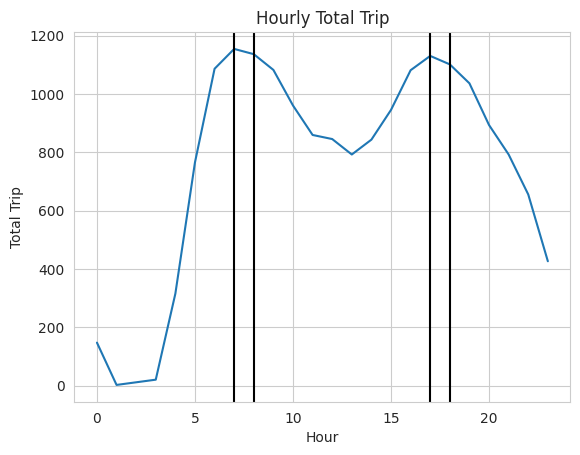

In [18]:
title = "Hourly Total Trip"

lineplot = jamly.total_trip.plot.line(xlabel="Hour", ylabel="Total Trip", title=title)

for line in jarly.iloc[:4].index:

  lineplot.axvline(line, color="black")

In [19]:
total_route = origin["route"].nunique()

total_route

69

In [20]:
total_route_trip = origin["route"].value_counts().to_frame().rename(columns={"count": "total_trip"})

total_route_trip.iloc[:10]

,total_trip
route,
JAKARTAKOTA-BOGOR,2760
BOGOR-JAKARTAKOTA,2668
RANGKASBITUNG-TANAHABANG,1062
TANAHABANG-RANGKASBITUNG,1062
KAMPUNGBANDAN-CIKARANG,1048
CIKARANG-KAMPUNGBANDAN,916
BEKASI-KAMPUNGBANDAN,756
KAMPUNGBANDAN-BEKASI,741
TANGERANG-DURI,610


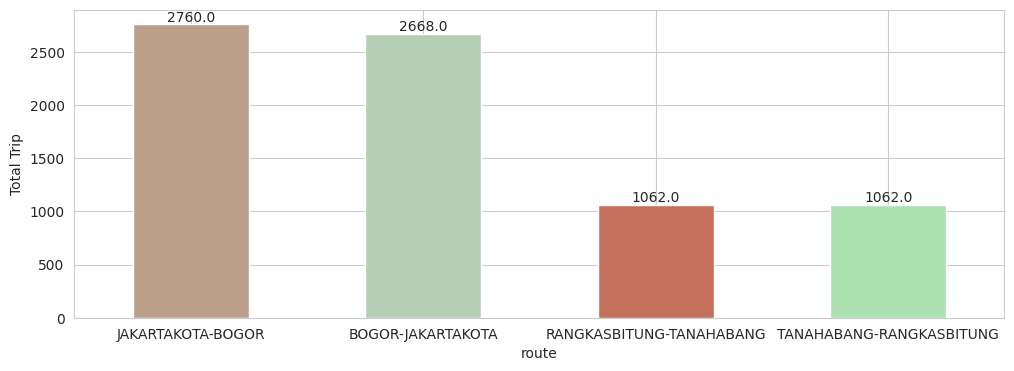

In [21]:
barplot(total_route_trip.iloc[:4, 0], figsize=(12, 4))

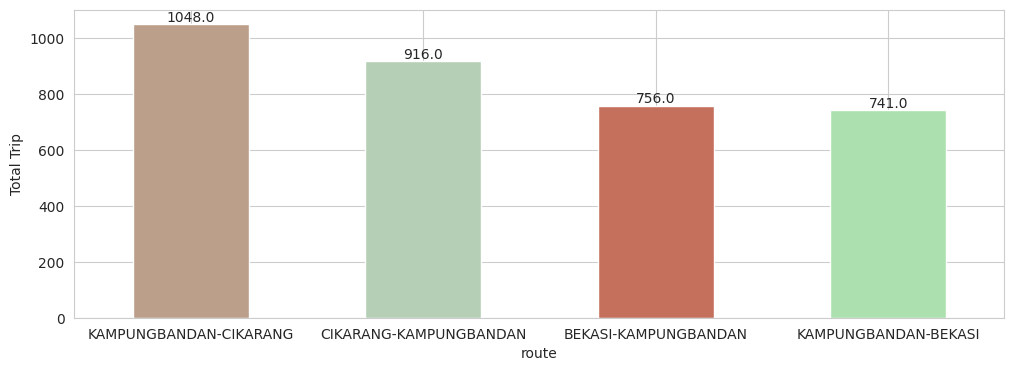

In [22]:
barplot(total_route_trip.iloc[4:8, 0], figsize=(12, 4))

In [23]:
triroute = origin.groupby(["route"])["time"].agg(["min", "max", "mean"]).round(3)

triroute.sort_values("mean").iloc[:5]

,min,max,mean
route,,,
MANGGARAI-TANAH ABANG,3.0,10.0,5.500
TANAHABANG-MANGGARAI,6.0,12.0,8.250
TANJUNGPRIUK-JAKARTAKOTA,4.0,16.0,9.333
DEPOK-BOJONGGEDE,6.0,13.0,9.500
DURI-MANGGARAI,5.0,20.0,10.207
